## Skoltech
## Intro to data science, fall 2021
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSfAQzhQGmdCYLtaeeaAn2mgNut5HO4U6l3G1KUbBO0qDtA7FA/viewform

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza:https://piazza.com/class/ku068l4dg0068n

## Dataset
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

#### Attributes

**People**

-   ID: Customer's unique identifier
-   Year_Birth: Customer's birth year
-   Education: Customer's education level
-   Marital_Status: Customer's marital status
-   Kidhome: Number of children in customer's household
-   Teenhome: Number of teenagers in customer's household
-   Dt_Customer: Date of customer's enrollment with the company
-   Recency: Number of days since customer's last purchase
-   Complain: 1 if customer complained in the last 2 years, 0 otherwise


**Products**

-   MntWines: Amount spent on wine in last 2 years
-   MntFruits: Amount spent on fruits in last 2 years
-   MntMeatProducts: Amount spent on meat in last 2 years
-   MntFishProducts: Amount spent on fish in last 2 years
-   MntSweetProducts: Amount spent on sweets in last 2 years
-   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

-   NumDealsPurchases: Number of purchases made with a discount
-   AcceptedCmp: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Behavior**

-   NumWebPurchases: Number of purchases made through the company’s web site
-   NumCatalogPurchases: Number of purchases made using a catalogue
-   NumStorePurchases: Number of purchases made directly in stores
-   NumWebVisitsMonth: Number of visits to company’s web site in the last month
-   NumDealsPurchases: Number of purchases made with a discount


#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [2]:
COLAB_P = True
if COLAB_P:
  print("Upload your file, then read it with pd.read_csv()")
  from google.colab import files
  uploaded = files.upload()
  fn = list(uploaded.keys())[0]
  print("File is uploaded to ", fn)
else:
  print("Place your file to the same directory as the notebook, then read your file with pd.read_csv()")

Upload your file, then read it with pd.read_csv()


Saving marketing_campaign.csv to marketing_campaign.csv
File is uploaded to  marketing_campaign.csv


In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

## 1. Data exploration

Let's take a closer look at the data.

### Q1.1

#### How many columns in the dataset?

In [4]:
df.shape[1]

22

### Q1.2

#### How many unique marital statuses are there?

In [5]:
df.Marital_Status.describe() #8
#df.Marital_Status.value_counts()

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

### Q1.3
#### What is the average age, if we assume now it is 2021? E.g. if we would have two people born in 2001 and 1999, the average age would be 21. Please answer with an integer.

In [6]:
2021 - df.Year_Birth.mean()

46.19419642857133

### Q1.4
#### There are some columns related to spendings by category, they are starting with 'Mnt': MntWines, MntFruits, etc. In which category people spent the most on average?

In [7]:
Mnt =[]
for text in df.columns:
  if 'Mnt' in text:
    Mnt.append(text)
print(Mnt)

['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [8]:
N = np.argmax(df[Mnt[i]].mean() for i in range (len(Mnt)))
print(Mnt[N])

MntWines


### Q1.5

There are columns describing how customers make their orders, these columns start with num, e.g. 'NumDealsPurchases',
 or 'NumWebPurchases'. Build a histogram for the number of web visits (NumWebVisitsMonth). What is the 'most popular' number of visits, i.e. what number of visits encounters most often in the column?

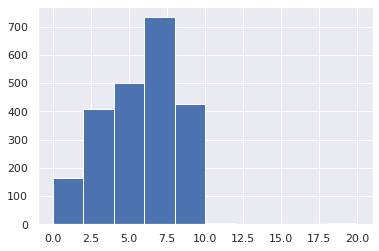

In [9]:
plt.hist(df.NumWebVisitsMonth);

In [10]:
df.NumWebVisitsMonth.value_counts()

7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
20      3
10      3
19      2
14      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for all the 'Num..' columns with 'AcceptedCmp' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how customers with different behavior patterns react to the marketing proposals. Note, to use the column as hue, it should be passed with the rest of the columns; also you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) The people, who don't visit web site don't buy with a discount
- (b) All the people who often visit the website buy a lot online
- (c) People, who buy with a discount, much more often accept marketing campaign
- (d) There is not any clear dependency between web visits and the number of catalog purchases

In [11]:
Num =[]
for text in df.columns:
  if 'Num' in text:
    Num.append(text)
print(Num)
Num.append('AcceptedCmp')

['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


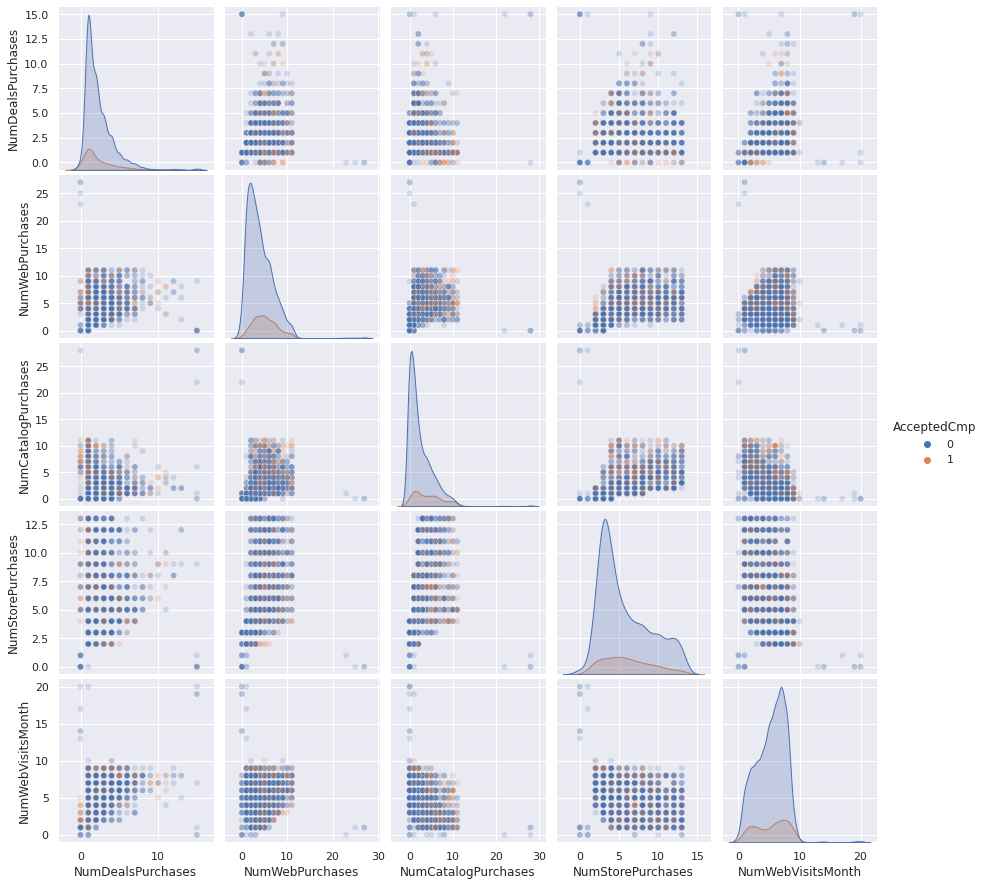

In [12]:
NumCol = df[Num]
sns.pairplot(NumCol, hue = 'AcceptedCmp', kind='scatter', plot_kws=dict(alpha=0.2));

- (a) The people, who don't visit web site don't buy with a discount: false
- (b) All the people who often visit the website buy a lot online: false
- (c) People, who buy with a discount, much more often accept marketing campaign: false
- (d) There is not any clear dependency between web visits and the number of catalog purchases: true

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for teen at home ('Teenhome') and kids at home ('Kidhome'). How many customers have 2 kids and a single teenager?

In [13]:
pd.crosstab(df.Teenhome,df.Kidhome)

Kidhome,0,1,2
Teenhome,,,
0,638,503,17
1,625,374,31
2,30,22,0


31

### Q1.8
There is a 'Dt_Customer' column with a customer registration date. In which month there were a maximum number of registrations? Answer with the name, i.e. 'January'. Hint: you probably want to convert the column to datetime from string.

In [14]:
from datetime import datetime
dates = pd.to_datetime(df.Dt_Customer)
df['Month'] = dates.dt.month_name()
df.Month.value_counts()

August       211
October      209
March        202
December     202
May          192
January      191
February     187
November     185
April        184
June         170
September    166
July         141
Name: Month, dtype: int64

August

In [15]:
df.drop(columns=['Month'],inplace=True)

## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that has the same value for all the people and they don't have a description in the sections above. Let's drop them. As an answer, write the names of these columns divided by a comma.

In [16]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0


In [17]:
df.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [18]:
df.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [19]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])

### Q2.2
As we could see before, there are some strange rare marital statuses. We going to leave only three options - 'Married', 'Together' and 'Single'. All other options should be changed to 'Single'. How many people are now in this category?

In [20]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
df.loc[(df.Marital_Status != 'Married')& (df.Marital_Status != 'Together')&(df.Marital_Status!='Single'),'Marital_Status'] = 'Single'


In [22]:
df.Marital_Status.value_counts()

Married     864
Single      796
Together    580
Name: Marital_Status, dtype: int64

796

### Q2.3

Now it's time to talk about the task for today. Our big retail company "Y6" want to launch a marketing campaign, but we want to make the marketing proposal only to people, who would accept it with the high probability. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'AcceptedCmp' column) and data (the rest of the columns). How many positive labels are there in target?


In [23]:
y = df['AcceptedCmp']
X = df.drop(columns=['AcceptedCmp'])

In [24]:
y.value_counts()

0    1906
1     334
Name: AcceptedCmp, dtype: int64

334

### Q2.4

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 42 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True,stratify=y)

In [26]:
y_test.value_counts()

0    572
1    100
Name: AcceptedCmp, dtype: int64

100

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, and classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form, e.g. `Dt_Customer` as a date or `Education` as categorical, so let's make a copy of x with the following columns for the section:

'Year_Birth', 'Kidhome',
'Teenhome',  'Recency', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'

In [29]:
Xcopy = df[['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']].copy()
Xcopy_train, Xcopy_test, y_train, y_test = train_test_split(Xcopy,y, test_size=0.3, random_state=42, shuffle=True,stratify=y)
from sklearn.metrics import f1_score

In [30]:
df.isnull().sum() #check for missing values

Year_Birth             0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
AcceptedCmp            0
dtype: int64

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression(max_iter = 5000)
clf.fit(Xcopy_train,y_train)
y_pred = clf.predict(Xcopy_test)
print('f1_score = ',f1_score(y_test,y_pred))

f1_score =  0.27067669172932335


### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
clf = KNeighborsClassifier()
clf.fit(Xcopy_train,y_train)

y_pred = clf.predict(Xcopy_test)
print('f1_score = ',f1_score(y_test,y_pred))

f1_score =  0.2647058823529412


### Q3.3

Build a random forest classifier. What is the f1_score for the model?

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
model = RandomForestClassifier()

model.fit(Xcopy_train,y_train)
y_pred = model.predict(Xcopy_test)

print('f1_score = ',f1_score(y_test,y_pred))

f1_score =  0.373134328358209


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. What is the f1 score for the model trained on the full train dataset with this regularization?

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [38]:
cv = StratifiedKFold(shuffle = True,random_state=42)
clf = LogisticRegression(penalty='l2',max_iter = 5000)

grid = {
    'C': np.logspace(-1,1,50)
}
gs = GridSearchCV(clf, param_grid=grid,scoring='f1',cv=cv,n_jobs=-1)
gs.fit(Xcopy_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecate...
        1.04811313,  1.1513954 ,  1.26485522,  1.38949549,  1.52641797,
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
      

In [39]:
gs.best_estimator_

LogisticRegression(C=4.714866363457392, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
gs.best_score_

0.3138965412607754

In [41]:
clf = gs.best_estimator_
clf.fit(Xcopy_train,y_train)
y_pred = clf.predict(Xcopy_test)
f1_score(y_test,y_pred)

0.27067669172932335

C = 4.715

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [43]:
clf = KNeighborsClassifier()

params = {
    'n_neighbors': stats.randint(2,70),
    'weights': ['uniform','distance'],
    'p': stats.randint(1,10),
}
rs = RandomizedSearchCV(estimator=clf,param_distributions=params,n_iter=100,scoring='f1')
rs.fit(Xcopy_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7aa8efcc50>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7aa8efc250>,
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [44]:
rs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [45]:
rs.best_score_

0.2913028936519109

In [46]:
clf = rs.best_estimator_
clf.fit(Xcopy_train,y_train)

y_pred = clf.predict(Xcopy_test)
f1_score(y_test, y_pred) 

0.39490445859872614

n_neighbors=3, p=2, weights='distance'

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [47]:
len(Xcopy_train.columns)

16

In [48]:
clf = RandomForestClassifier()
params = {
    'n_estimators': stats.randint(1,100),
    'max_features': stats.randint(1,16),
}
rs = RandomizedSearchCV(estimator=clf,param_distributions=params,n_iter=100,scoring='f1')
rs.fit(Xcopy_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [49]:
rs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=33,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
model = rs.best_estimator_

model.fit(Xcopy_train,y_train)
y_pred = model.predict(Xcopy_test)

f1_score(y_test,y_pred)

0.45454545454545453

In [ ]:
n_estimators=33, max_features=11

## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'. 

What is the maximum value of MntWines now in the test set?

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
num_features = ['Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
scaler = StandardScaler()
scaler.fit(X_train[num_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [54]:
X_test.MntWines.max()

3.4452353571219576

### Q4.2
We have two categorical columns - education and marital status. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Education' and 'Marital_Status' columns.

How many columns do we have now?

In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[['Education','Marital_Status']])
encoded_features_test = pd.DataFrame(ohe.transform(X_test[['Education','Marital_Status']]))
encoded_features_train = pd.DataFrame(ohe.transform(X_train[['Education','Marital_Status']]))
ohe.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array(['Married', 'Single', 'Together'], dtype=object)]

In [56]:
Education_cols = [f'Edu_{col}' for col in ohe.categories_[0]]
Marital_Status_cols = [f'Marital_St_{col}' for col in ohe.categories_[1]]
dummy_col_names= [*Education_cols,*Marital_Status_cols]
encoded_features_test.columns = dummy_col_names
encoded_features_train.columns = dummy_col_names
encoded_features_test.index = X_test.index
encoded_features_train.index = X_train.index

In [57]:
X_train.drop(columns = ['Education','Marital_Status'],inplace=True)
X_test.drop(columns = ['Education','Marital_Status'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
X_train = pd.concat([X_train,encoded_features_train],axis = 1)
X_test = pd.concat([X_test,encoded_features_test],axis = 1)

In [59]:
len(X_test.columns)

25

### Q4.3 
We have a datetime column - customer registration date `Dt_Customer`. We can't use it directly, but we could use some derivative features. Let's create new columns 'recent_customer' with value `1` if a user was registered after `01/06/2020` and `0` otherways. The original `Dt_Customer` column should be dropped. How many recent customers do we have in the train set?

Hints: you can use `pd.to_datetime` for the column and `datetime.datetime` to create a new date.

In [60]:
from datetime import datetime

dates = pd.to_datetime(df.Dt_Customer)

X_train['Customer_Month'] = dates.dt.month
X_train['Customer_Day'] = dates.dt.day
X_train['Customer_Year'] = dates.dt.year

X_test['Customer_Month'] = dates.dt.month
X_test['Customer_Day'] = dates.dt.day
X_test['Customer_Year'] = dates.dt.year

In [61]:
def RecentCustomer(X):
  if X[2]==2020 and X[1]==6 and X[0]>1:
    return 1
  elif X[2]==2020 and X[1]>6:
    return 1
  elif X[2]>2020:
    return 1
  else:
    return 0  

In [62]:
X_train['recent_customer']=X_train[['Customer_Day','Customer_Month','Customer_Year']].apply(lambda x:RecentCustomer(x), axis=1)
X_test['recent_customer']=X_test[['Customer_Day','Customer_Month','Customer_Year']].apply(lambda x:RecentCustomer(x), axis=1)

In [63]:
X_train.drop(columns=['Customer_Day','Customer_Month','Customer_Year','Dt_Customer'],inplace=True)
X_test.drop(columns=['Customer_Day','Customer_Month','Customer_Year','Dt_Customer'],inplace=True)

In [64]:
X_train.recent_customer.value_counts()

0    1456
1     112
Name: recent_customer, dtype: int64

112

### Q4.4

To check the effects of the modification, train the logistic regression with an optimal C. What is the f1 score now?

In [65]:
clf = LogisticRegression(max_iter = 5000, C=4.715)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('f1_score = ',f1_score(y_test,y_pred))

f1_score =  0.380952380952381


### Q4.5

Another popular metric for unbalanced classification tasks is the ROC curve. Train a k-NN and random forest with optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [66]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [67]:
RF = RandomForestClassifier(max_features=11,n_estimators=33)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [68]:
KNN = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')
KNN.fit(X_train,y_train)

y_pred = KNN.predict(X_test)

In [69]:
# calculate the fpr and tpr for all thresholds of the classification
probs_RF = RF.predict_proba(X_test)
preds_RF = probs_RF[:,1]
fpr_RF, tpr_RF, threshold_RF = metrics.roc_curve(y_test, preds_RF)
roc_auc = metrics.auc(fpr_RF, tpr_RF)

probs_KNN = KNN.predict_proba(X_test)
preds_KNN = probs_KNN[:,1]
fpr_KNN, tpr_KNN, threshold_KNN = metrics.roc_curve(y_test, preds_KNN)
roc_auc = metrics.auc(fpr_KNN, tpr_KNN)

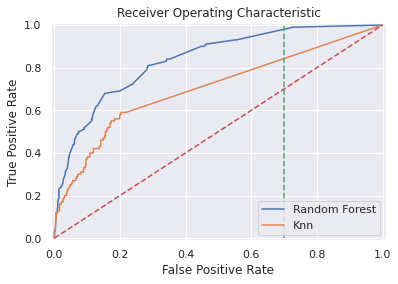

In [143]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_RF, tpr_RF, label = 'Random Forest')
plt.plot(fpr_KNN, tpr_KNN, label = 'Knn')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0.7, 0.7], [0, 1],'g--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
fpr_KNN

array([0.        , 0.00699301, 0.01048951, 0.01048951, 0.01573427,
       0.01573427, 0.02097902, 0.02097902, 0.02622378, 0.02622378,
       0.02797203, 0.02797203, 0.03146853, 0.03146853, 0.03671329,
       0.03671329, 0.03846154, 0.03846154, 0.04020979, 0.04020979,
       0.04370629, 0.04545455, 0.0472028 , 0.0472028 , 0.05244755,
       0.05244755, 0.05594406, 0.05594406, 0.06468531, 0.06468531,
       0.06818182, 0.06818182, 0.07167832, 0.07167832, 0.08041958,
       0.08041958, 0.08391608, 0.08741259, 0.08916084, 0.08916084,
       0.09265734, 0.09440559, 0.09440559, 0.09615385, 0.09615385,
       0.09965035, 0.09965035, 0.10839161, 0.10839161, 0.11888112,
       0.11888112, 0.13636364, 0.13636364, 0.14160839, 0.14160839,
       0.1486014 , 0.1486014 , 0.15384615, 0.15384615, 0.15559441,
       0.15559441, 0.15909091, 0.15909091, 0.16258741, 0.16258741,
       0.16958042, 0.16958042, 0.17307692, 0.17307692, 0.18356643,
       0.18356643, 0.18706294, 0.1993007 , 0.1993007 , 0.20279

In [81]:
fpr_KNN[[-2,-1]] #0.7 lies between these two points

array([0.21853147, 1.        ])

In [76]:
fpr_RF

array([0.        , 0.        , 0.        , 0.00174825, 0.0034965 ,
       0.0034965 , 0.00524476, 0.00524476, 0.00874126, 0.00874126,
       0.01048951, 0.01048951, 0.01398601, 0.01398601, 0.01923077,
       0.02097902, 0.02622378, 0.02622378, 0.03321678, 0.03321678,
       0.04020979, 0.04020979, 0.04195804, 0.04370629, 0.04545455,
       0.04545455, 0.05769231, 0.06118881, 0.06118881, 0.06993007,
       0.07342657, 0.07342657, 0.07517483, 0.08916084, 0.09090909,
       0.09090909, 0.09265734, 0.11363636, 0.11363636, 0.11538462,
       0.11713287, 0.12762238, 0.13111888, 0.15384615, 0.15734266,
       0.1958042 , 0.1993007 , 0.23426573, 0.23601399, 0.28146853,
       0.28496503, 0.28846154, 0.34090909, 0.34265734, 0.34965035,
       0.3513986 , 0.44755245, 0.45629371, 0.45804196, 0.46153846,
       0.5506993 , 0.5541958 , 0.72902098, 0.73076923, 0.73426573,
       0.73601399, 1.        ])

In [82]:
fpr_RF[[-6,-5]] #0.7 lies between these two points

array([0.5541958 , 0.72902098])

In [83]:
tpr_KNN_07 = (tpr_KNN[-1]-tpr_KNN[-2])/(fpr_KNN[-1]-fpr_KNN[-2])*(0.7-fpr_KNN[-2])+tpr_KNN[-2]
tpr_RF_07 = (tpr_RF[-5]-tpr_RF[-6])/(fpr_RF[-5]-fpr_RF[-6])*(0.7-fpr_RF[-6])+tpr_RF[-6]
print('difference between classificators on FPR 0.7 = ',tpr_RF_07-tpr_KNN_07)

difference between classificators on FPR 0.7 =  0.1374359731543624


##5

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

In [120]:
X_train.columns

Index(['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Edu_2n Cycle', 'Edu_Basic', 'Edu_Graduation', 'Edu_Master',
       'Edu_PhD', 'Marital_St_Married', 'Marital_St_Single',
       'Marital_St_Together', 'recent_customer'],
      dtype='object')

In [121]:
Xcopy2_train = X_train.copy()
Xcopy2_test = X_test.copy()
f1score=np.zeros(5)

In [122]:
KNN = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[0]=f1_score(y_test,y_pred)
print('initial f1_score_1 = ',f1score[0])

initial f1_score_1 =  0.3108108108108108


In [123]:
Xcopy2_train['MntTotal'] = Xcopy2_train[['MntWines', 'MntFruits', 'MntMeatProducts',
                                         'MntFishProducts', 'MntSweetProducts',
                                         'MntGoldProds']].apply(lambda x: sum(x),axis = 1)
Xcopy2_test ['MntTotal'] = Xcopy2_test [['MntWines', 'MntFruits', 'MntMeatProducts',
                                         'MntFishProducts', 'MntSweetProducts',
                                         'MntGoldProds']].apply(lambda x: sum(x),axis = 1)

In [124]:
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[1]=f1_score(y_test,y_pred)
print('after adding "MntTotal" column: f1_score  = ',f1score[1])

after adding "MntTotal" column: f1_score  =  0.3178807947019867


In [125]:
Xcopy2_train.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts',
                           'MntGoldProds'],inplace=True)
Xcopy2_test.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 
                          'MntFishProducts', 'MntSweetProducts', 
                          'MntGoldProds'],inplace=True)

In [126]:
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[2]=f1_score(y_test,y_pred)
print('after deleting Mnt- columns: f1_score  = ',f1score[2])

after deleting Mnt- columns: f1_score  =  0.2929936305732484


In [127]:
Xcopy2_train['Kids+Teens'] = Xcopy2_train[['Kidhome', 'Teenhome']].apply(lambda x: sum(x),axis = 1)
Xcopy2_test ['Kid+Teens'] = Xcopy2_test[['Kidhome', 'Teenhome']].apply(lambda x: sum(x),axis = 1)

In [128]:
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[3]=f1_score(y_test,y_pred)
print('after adding "Kids+Teens" column: f1_score  = ',f1score[3])

after adding "Kids+Teens" column: f1_score  =  0.3057324840764331


In [129]:
Xcopy2_train.drop(columns=['Kidhome', 'Teenhome'],inplace=True)
Xcopy2_test.drop(columns=['Kidhome', 'Teenhome'],inplace=True)

In [130]:
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[4]=f1_score(y_test,y_pred)
print('after deleting  "Kidhome", "Teenhome" columns: f1_score  = ',f1score[4])

after deleting  "Kidhome", "Teenhome" columns: f1_score  =  0.2948717948717949


In [131]:
print('All f1_scores:',f1score)

All f1_scores: [0.31081081 0.31788079 0.29299363 0.30573248 0.29487179]


So, we should not delete any columns. Then:

In [132]:
Xcopy2_train = X_train.copy()
Xcopy2_test = X_test.copy()
f1score=np.zeros(3)

In [133]:
KNN = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[0]=f1_score(y_test,y_pred)
print('initial f1_score_1 = ',f1score[0])

initial f1_score_1 =  0.3108108108108108


In [134]:
Xcopy2_train['MntTotal'] = Xcopy2_train[['MntWines', 'MntFruits', 'MntMeatProducts',
                                         'MntFishProducts', 'MntSweetProducts',
                                         'MntGoldProds']].apply(lambda x: sum(x),axis = 1)
Xcopy2_test ['MntTotal'] = Xcopy2_test [['MntWines', 'MntFruits', 'MntMeatProducts',
                                         'MntFishProducts', 'MntSweetProducts',
                                         'MntGoldProds']].apply(lambda x: sum(x),axis = 1)

In [135]:
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[1]=f1_score(y_test,y_pred)
print('after adding "MntTotal" column: f1_score  = ',f1score[1])

after adding "MntTotal" column: f1_score  =  0.3178807947019867


In [136]:
Xcopy2_train['Kids+Teens'] = Xcopy2_train[['Kidhome', 'Teenhome']].apply(lambda x: sum(x),axis = 1)
Xcopy2_test ['Kid+Teens'] = Xcopy2_test[['Kidhome', 'Teenhome']].apply(lambda x: sum(x),axis = 1)

In [137]:
KNN.fit(Xcopy2_train,y_train)
y_pred = KNN.predict(Xcopy2_test)
f1score[2]=f1_score(y_test,y_pred)
print('after adding "Kids+Teens" column: f1_score  = ',f1score[2])

after adding "Kids+Teens" column: f1_score  =  0.33548387096774196


In [138]:
print('All f1_scores:',f1score)

All f1_scores: [0.31081081 0.31788079 0.33548387]


So, in the end, additional columns "MntTotal" and "Kids+Teens" increased f1_score from 0.311 to 0.335 

### Q5.2

Train an xgboost model with f1 score 0.47+

In [ ]:
import xgboost as xgb

dmat_train = xgb.DMatrix(X_train, y_train)
dmat_test = xgb.DMatrix(X_test, y_test)
booster = xgb.train({'max_depth': 3, 'eta': 1, 'objective': 'binary:logistic'},
                    dmat_train
                    # ,evals=[(dmat_train, "train"), (dmat_test, "test")]
                    )

In [ ]:
y_pred_proba = booster.predict(dmat_test)
y_pred = (y_pred_proba*10)//5
print('f1_score = ',f1_score(y_test,y_pred))

f1_score =  0.5088757396449703
